# Линейная классификация

Задача - расположить гиперплоскость так, чтобы она наилучшим образом разделяла объекты разных классов.

<div align="center"><img src="images/8.png" width="400"/></div>

Гиперплоскость можно задать прямой.

<div align="center"><img src="images/9.png" width="500"/></div>

Уравнение гиперплоскости:

### $$ \langle w, x \rangle = 0 $$

Линейный классификатор:

## $$ a(x) = sign \sum \limits_{j=1}^{d+1} w_j x^j = sign \langle w, x \rangle $$

## Отступ

Будем решать задачу бинарной классификации на множество классов $ Y = \{-1, +1\} $.

Классификатор, описанный формулой выше, может дать предположение, к какому классу относить объект. Но нам хочется еще знать степень уверенности классификатора в собственном предсказании. Здесь всё логично: чем дальше объект находится от разделяющей гиперплоскости, тем с большей уверенностью мы можем сказать, что он относится именно к этому классу. И наоборот: если объект находится близко к разделяющей гиперплоскости, то мы менее уверены в том, что классификатор сделал верное предположение.

Для измерения расстояния от разделяющей гиперплоскости введем термин **отступ**:

<div align="center"><img src="images/10.png" width="700"/></div>

## $$ M_i = y_i \langle w, x_i \rangle $$

- $ M_i > 0 $ - правильный ответ

- $ M_i < 0 $ - неправильный ответ

Чем больше отступ, тем больше уверенность в предсказании.

## Метрики качества линейного классификатора

### Доля неправильных ответов

### $$ Q(a, X) = \frac{1}{l} \sum \limits_{i=1}^{l}[y_i \langle w, x_i \rangle < 0] $$

### $$ Q(a, X) = \frac{1}{l} \sum \limits_{i=1}^{l}[M_i < 0] $$

### Пороговая функция потерь

<div align="center"><img src="images/11.png" width="500"/></div>

- сложно оптимизировать,
- поэтому введем гладкую оценку пороговой функции, такую, что:

### $$ [M_i < 0] \le \widetilde L(M) $$

При этом новый функционал ошибки должен также быть больше или равен старого на всей области определения:

### $$ Q(a, X) \le \widetilde Q(a, X) $$

Фактически новый функционал ошибки равен:

### $$ \widetilde Q(a, X) = \frac{1}{l} \sum \limits_{i=1}^{l}\widetilde L(M_i) $$

И мы его минимизируем, надеясь на то, что оригинальный функционал тоже будет уменьшаться при том же изменении параметров.

### $$ Q(a, X) \le \widetilde Q(a, X) = \frac{1}{l} \sum \limits_{i=1}^{l}\widetilde L(M_i) \rightarrow \min \limits_a $$

Под то, что мы только что описали, подходят, например, вот такие функционалы:

<div align="center"><img src="images/12.png" width="700"/></div>

## Логистическая функция потерь

### $$ \widetilde Q(a, X) = \frac{1}{l} \sum\limits_{i=1}^{l} ln(1+\exp(-M_i)) $$

### $$ \widetilde Q(a, X) = \frac{1}{l} \sum\limits_{i=1}^{l} ln(1+\exp(-y_i \langle w, x_i \rangle)) $$

<div align="center"><img src="images/14.png" width="700"/></div>

Отсюда можно выразить вероятность принадлежности объекта классу +1.

- Хотим оценить $ P(y=1|x) $
- Введем $ \pi(x) = P(y=1|x) $

#### $$ \pi(x) = 1P(y=1|x)+0P(y=0|x)=\mathbb{E}(y|x) $$

Введем обобщенную линейную модель:

### $$ g(\mathbb{E}(y|x)) \approx \langle w, x\rangle $$

### $$ \mathbb{E}(y|x) \approx g^{-1}( \langle w, x\rangle) $$

Для решения проблемы задача регрессии может быть сформулирована иначе: вместо предсказания бинарной переменной мы предсказываем непрерывную переменную со значениями на отрезке [0,1] при любых значениях независимых переменных. Это достигается применением следующего регрессионного уравнения (логит-преобразование).

<div align="center"><img src="images/13.png" width="700"/></div>

### $$ \mathbb{E}(y|x) = \pi(x) \approx \frac{e^{\langle w, x \rangle}}{1 + e^{\langle w, x \rangle}} $$

Обратная функция $ g^{-1} $ в нашем случае будет выглядеть так:

## $$ \pi(x) \approx \frac{e^{\langle w, x \rangle}}{1 + e^{\langle w, x \rangle}} \leftrightarrow ln \frac{\pi(x)}{1 - \pi(x)} \approx \langle w, x \rangle $$

## Правдоподобие обучающей выборки

**Правдоподобие** — это вероятность получить наблюдаемую выборку при конкретном значении параметра распределения.

**Оценка максимального правдоподобия** — значение параметра распределения, которое максимизирует правдоподобие.

Допустим, мы рассматриваем распределение значений некоторой выборки $ X $ и приближаем ее через функцию $ F(x, \theta) $. Тогда нам нужно максимизировать прадоподобие L:

### $$ L(X^N, \theta) \equiv \prod \limits_{i=1}^{n} P(X = X_i, \theta) $$

### $$ \theta_{ОМП} = {argmax} _{\theta} L(X^n, \theta) $$

Для линейного классификатора правдоподобие:

### $$ L(X) = \prod \limits_{i: y_i = 1} \pi(x_i) \prod \limits_{i: y_i = 0} (1 - \pi(x_i)) $$

Произведение максимизировать сложно, поэтому перейдем к максимизации суммы, используя логарифм:

### $$ lnL(X) = \sum \limits_{i=1}^l \big( y_i ln\pi(x_i) + (1 - y_i) ln(1 - \pi(x_i)) \big) \rightarrow max $$

Если мы переобозначим класс 0 как класс -1, то нахождение экстремума для предыдущего выражения даст логистическую функцию потерь:

### $$ \widetilde Q(a, X) = \frac{1}{l} \sum\limits_{i=1}^{l} ln(1+\exp(-M_i)) $$

# Логистическая регрессия и проблема XOR

XOR - это логическая операция, которая возвращает 1, если аргументы не равны, и 0 в обратном случае. Если мы изобразим случайные данные разных классов по принципу XOR, то увидим, что линейно их никак не разделить. 

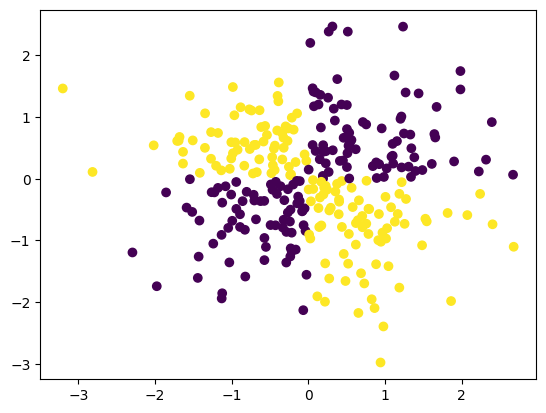

In [2]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas
%matplotlib inline

# сгенерируем синтетические данные, 
variant = 10 # вставьте ваш вариант
rng = np.random.RandomState(variant)
X = rng.randn(300, 2)
y = np.logical_xor(X[:, 0] < 0, X[:, 1] < 0)
plt.scatter(X[:, 0], X[:, 1], c=y);

/var/folders/th/dn5zc4dd3rz56c206fznc1th0000gn/T/ipykernel_52904/3835415354.py:17: UserWarning: The following kwargs were not used by contour: 'linetypes'
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes='--')


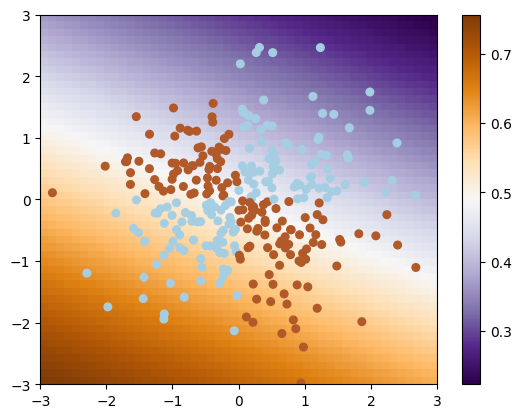

In [3]:
# Создадим классификатор логистической регрессии и обучим его на тестовой выборке
classifier = LogisticRegression()
classifier.fit(X, y)

# Построим график, который покажет, как обучилась логистическая регрессия.
def plot_boundary(clf, X, y):
    xx, yy = np.meshgrid(np.linspace(-3, 3, 50), np.linspace(-3, 3, 50))
    Z = clf.predict_proba(np.vstack((xx.ravel(), yy.ravel())).T)[:, 1].reshape(xx.shape)
    image = plt.imshow(
        Z,
        interpolation='nearest',
        extent=(xx.min(), xx.max(), yy.min(), yy.max()),
        aspect='auto',
        origin='lower',
        cmap=plt.cm.PuOr_r
    )
    contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes='--')
    plt.scatter(X[:, 0], X[:, 1], s=30, c=y, cmap=plt.cm.Paired)
    plt.axis([-3, 3, -3, 3])
    plt.colorbar(image)
    
plot_boundary(classifier, X, y)

Видим, что работает так себе. Что если на вход подать не $x_1$ и $x_2$, а некоторые их полиномы?
Преобразуем текущие признаки в 6 других: $1, x_1, x_2, x_1^2, x_1x_2$ и $x_2^2$.

/var/folders/th/dn5zc4dd3rz56c206fznc1th0000gn/T/ipykernel_52904/3835415354.py:17: UserWarning: The following kwargs were not used by contour: 'linetypes'
  contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2, linetypes='--')


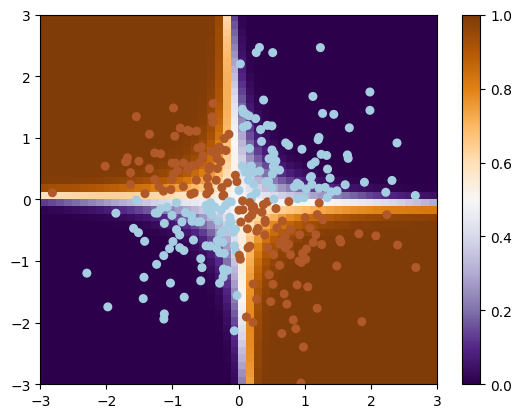

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
new_classifier = Pipeline([('poly', PolynomialFeatures(degree=2)), ('logit', LogisticRegression())])
new_classifier.fit(X, y)
# Обучите новый классификатор на тех же данных и посмотрим, как он себя ведет в исходном пространстве признаков.

plot_boundary(new_classifier, X, y)

In [5]:
X_test = rng.randn(300, 2)
y_test = np.logical_xor(X_test[:, 0] < 0, X_test[:, 1] < 0)

new_classifier.score(X_test, y_test)

0.9633333333333334